# Trabalho/ Projeto de Grupo - Mariana Pereira e Daniela Araújo

# A

<strong>URL do conjunto de dados</strong> - https://gist.github.com/apurvadave/3afe546bc05e4e544b24 

<strong>Fundamentação da escolha</strong> - O shark tank é um reality show que é do nosso interesse e consequentemente analisar os seus respetivos dados será uma experiência bastante didática. A dinâmica deste programa é deveras pertinente para a compreensão dos dados a analisar, portanto é constituído por concorrentes que através de uma apresentação transmitem a sua ideia para uma empresa a um painel de investidores, mais conhecidos como "sharks", que decidem se devem ou não investir nessa empresa. Posteriormente, os investidores dão uma certa quantia em dinheiro em troca de uma participação percentual na empresa. Projetamos assim, que é uma oportunidade única e que com este trabalho iremos enriquecer o nosso conhecimento a nível de processamento, analise e visualizações de informação extraída do conjunto de dados selecionado.

<strong>Sobre o conjunto de dados</strong> - Os dados que iremos analisar neste trabalho contêm informações sobre todas as propostas das primeiras 4 temporadas do programa, incluindo:

* o nome
* quanto é que os concorrentes pediram de financiamento
* se foi ou não financiado
* quais tubarões escolheram para investir no empreendimento 
* se financiado, a quantidade de dinheiro que os tubarões colocaram e a porcentagem de capital que receberam em troca

In [821]:
# Import the module we need to use for the dataset
import pandas as pd
import matplotlib.pyplot as plt

In [822]:
# Import the csv data file
df = pd.read_csv("data.csv", index_col=0, parse_dates=True, encoding='latin-1')
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Valuation,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,# Sharks,$ per shark,Details / Notes
Row,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,"$90,909",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"$50,000",NaN
3.0,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,"$920,000",1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,"$230,000",NaN
4.0,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
5.0,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [823]:
# Inspect the csv data 
print(df.shape)
print(df.index.is_unique)
print(df.columns.is_unique)
print(df[df.duplicated() == True])
#df.head()

TypeError: 'str' object is not callable

Portanto, no geral o ficheiro csv está pronto para ser tratado, dado que não se verifica valores duplicados para linhas e colunas, são todos exclusivos.

<strong>Tratamento de dados</strong>

In [824]:
# Remover colunas que não precisamos para a análise
df = df.drop(
    ['Valuation','# Sharks', 'Details / Notes'],
    axis=1 
)

# Renomear as colunas que precisamos para a análise
df = df.rename(
    columns = {
        'No. in series': 'No. episode','Entrepreneur Gender': 'Gender',
        '$ per shark': 'Total'
        } 
)

print(df.describe())
df.info()

TypeError: 'str' object is not callable

O ficheiro está pronto para ser usado com os nomes respetivos. De seguida é realizada a verificação de dados ausentes, que para além dos nomes das colunas também é necessária.

In [825]:
# Verificação de dados ausentes (missing data checking)
print(df.isna())

TypeError: 'str' object is not callable

Existe uma coluna para cada um dos "sharks", sendo que 1 indica que eles optaram por investir nessa empresa, enquanto um valor ausente indica que eles não optaram por investir nessa empresa. Até ao momento esses valores ausentes aparecem como NaNs quando lemos os dados, portanto é necessário preencher esses valores ausentes com zeros.

In [826]:
sharks = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington"]
df[sharks] = df[sharks].fillna(0)
df.head()

,Season,No. episode,Company,Deal,Industry,Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Total
Row,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2.0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"$50,000"
3.0,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,"$230,000"
4.0,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5.0,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


Verificamos que os dados respetivos a "Amount", "Equity", "Valuation" e "Total invested" estão a ser tratados atualmente como variáveis categóricas, 'dtype: object'. Portanto, vamos proceder a limpar essas colunas e convertê-las em numéricos, isto é, um dtype de int ou float, porque precisaremos realizar operações matemáticas nessas colunas.

In [808]:
# Converter "Amount" a númerico
df.Amount = df[df.Deal == "Yes"].Amount.str.replace("$","").str.replace(",","").astype(int)

/var/folders/_h/qh8nl2t946s4101bs7h1fy7w0000gn/T/ipykernel_16120/1197805570.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Amount = df[df.Deal == "Yes"].Amount.str.replace("$","").str.replace(",","").astype(int)


In [809]:
# Converter "Equity" a númerico
df.Equity = df[df.Deal == "Yes"].Equity.str.replace("%","").str.replace("n/a", "0").astype(float)

In [810]:
df.head()

,Season,No. episode,Company,Deal,Industry,Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Total
Row,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2.0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"$50,000"
3.0,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,"$230,000"
4.0,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5.0,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


<strong> Questão 1 - Quantos episódios existem no total? </strong>

In [811]:
# Total de espisódios corresponde ao número de linhas.
# Portanto iremos utilizar o atributo shape de pandas.DataFrame que armazena o número de linhas e colunas como uma tupla, o 0 signfica número de linhas e o 1 o número de colunas.
total_episode = (df.shape[0])
total_episode

496

Conclui-se que existem no total 496 episódios.

<strong> Questão 2 - Quantas companhias conseguiram o investimento e quantas não conseguiram?  </strong>

In [812]:
# pandas count distinct values in column
df['Deal'].value_counts()

Yes    249
No     246
Name: Deal, dtype: int64

Assim sendo, 249 companhias conseguiram o investimento e fecharam negócio, e por outro lado 246 companhias não conseguiram fechar negócio.

<strong> Questão 3 - Qual o valor da companhia que pediu o investimento mais elevado? </strong>

In [813]:
#Determinar o valor mais elevado na coluna "Amount"
df.loc[df['Amount'].idxmax()]

Season                     6.0
No. episode               27.0
Company                 AirCar
Deal                       Yes
Industry       Green/CleanTech
Gender                    Male
Amount               5000000.0
Equity                    50.0
Corcoran                   0.0
Cuban                      0.0
Greiner                    0.0
Herjavec                   1.0
John                       0.0
O'Leary                    0.0
Harrington                 0.0
Guest                      NaN
Total               $5,000,000
Name: 485.0, dtype: object

A companhia AirCar pediu um investimento de $5,000,000, tornando-se assim a companhia que solicitou o investimento mais elevado durante as primeiras 6 temporadas.

<strong> Questão 4 - Qual a companhia que valia mais? </strong>

In [814]:
# A avaliação de uma empresa é o quanto ela vale. Se alguém investir $ 10.000 por uma participação de 40% na empresa, isso significa que a empresa deve ser avaliada em $ 25.000, já que 40% de $ 25.000 são $ 10.000.
# Calcule a avaliação de cada empresa que foi financiada. Qual empresa foi mais valiosa? É a mesma empresa que recebeu o maior investimento total dos "sharks"?
df["Valuation"] = df[df.Deal == "Yes"].Amount / (df[df.Deal == "Yes"].Equity / 100)
max_val = df[(df.Deal == "Yes") & (df.Equity != 0)].Valuation.max()
df[df.Valuation == max_val]

,Season,No. episode,Company,Deal,Industry,Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Total,Valuation
Row,,,,,,,,,,,,,,,,,,
423.0,6.0,11.0,Zipz,Yes,Food and Beverage,Male,2500000.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"$2,500,000",25000000.0


In [815]:
max_amt = df[df.Deal == "Yes"].Amount.max()
df[df.Amount == max_amt]

,Season,No. episode,Company,Deal,Industry,Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Total,Valuation
Row,,,,,,,,,,,,,,,,,,
485.0,6.0,27.0,AirCar,Yes,Green/CleanTech,Male,5000000.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,"$5,000,000",10000000.0


A empresa "Zipz" foi a mais valiosa, avaliada em 25 milhões de dólares. O'Leary investiu 2,5 milhões de dólares com um patrimônio de 10%. No entanto, não é o máximo que um tubarão investiu: a empresa "AirCar" recebeu 5 milhões de dólares, mas com 50% de capital, avaliado apenas em 10 milhões de dólares.

<strong> Questão 5 - Qual "shark" investiu mais? </strong>

In [816]:
#Calcule a quantia total de dinheiro que cada tubarão investiu ao longo das 6 temporadas. Qual tubarão investiu mais dinheiro nas 6 temporadas?
#Logo se x "sharks" financiaram um determinado empreendimento, o valor que cada tubarão investiu é o valor total dividido por x.
sums = df.loc[:, "Corcoran":"Guest"].sum(axis=1)
each_amounts = df.Amount.divide(sums)
df.loc[:, "Corcoran":"Guest"].multiply(each_amounts, axis=0).sum()

Corcoran       4912500.0
Cuban         17817500.0
Greiner        8170000.0
Herjavec      16297500.0
John           8154000.0
O'Leary        7952500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

De acordo com os cálculos, Corcoran investiu mais dinheiro nas 6 temporadas com um total de 17.817.500 dólares

<strong> Questão 6 - Existe alguma preferência numa determinada indústria? Se sim, qual? 
    E a indústria com com menos investimentos qual é?</strong>

In [817]:
# Calcula-se a taxa de financiamento (a proporção de empresas que foram financiadas) para cada setor. Faça uma visualização mostrando essas informações.
industry_funded = df[df.Deal == "Yes"].groupby("Industry").Deal.count() / df.groupby("Industry").Deal.count()

<AxesSubplot:title={'center':'Investments by Industries'}, ylabel='Industry'>

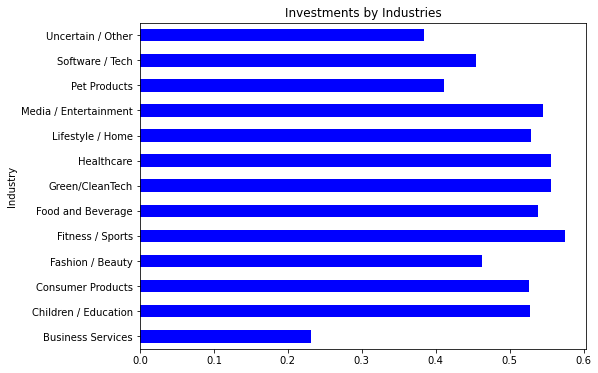

In [818]:
# Plot the graph
industry_funded.plot(
  kind = 'barh',
  title = 'Investments by Industries',
  figsize = [8,6],
  color = 'blue')

Analisando o gráfico, verifica-se que o setor de Fitness/Esportes tem a maior taxa de financiamento, e o setor de Serviços Empresariais tem a menor taxa de financiamento.